### Notebook for the epithelial label transfer of Reference mesenchymal dataset to rest of mesenchymal cells from GCA using `scANVI`

- **Developed by:** Anna Maguza
- **Institute of Computational Biology - Computational Health Department - Helmholtz Munich**
- 27th February 2022

### Import required modules

In [1]:
import scvi
import anndata
import warnings
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

Global seed set to 0
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/anna.maguza/miniconda3/envs/scvi_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
absl                NA
asttokens           NA
attr                22.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
brotli              NA
certifi             2022.09.24
cffi                1.15.1
charset_normalizer  2.1.1
chex                0.1.5
contextlib2         NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
deprecate           0.3.2
docrep              0.3.2
entrypoints         0.4
executing           1.2.0
flax                0.6.2
fsspec              2022.11.0
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
idna                3.4
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          8.0.2
jax                 0.3.25
jaxlib              0.3.25
jedi                0.18.2
joblib              1.2.0
jupyt

In [4]:
warnings.simplefilter(action = 'ignore')
scvi.settings.seed = 1712
%config InlineBackend.print_figure_kwargs = {'facecolor' : "w"}
%config InlineBackend.figure_format = 'retina'

Global seed set to 1712


In [5]:
arches_params = dict(
    use_layer_norm = "both",
    use_batch_norm = "none",
    encode_covariates = True,
    dropout_rate = 0.2,
    n_layers = 2,
)

### Read in Reference object

In [6]:
reference_input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/Geosketch_subset/Mesenchymal_reference_map_subset_after_geosketch2.h5ad'
reference_output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/Geosketch_subset/Mesenchymal_reference_map_subset_after_geosketch2_output.h5ad'

In [7]:
reference = sc.read_h5ad(reference_input)
reference.X

<107299x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 218801384 stored elements in Compressed Sparse Row format>

In [8]:
reference.obs

UniqueCell_ID  \
cell_id                                                                  
AACACGTTCTTGCATT_Ileum-1_Stem Cell  AACACGTTCTTGCATT_Ileum-1_Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell  AACCGCGCATGAAGTA_Ileum-1_Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell  AACTCAGAGCGATCCC_Ileum-1_Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell  AACTCCCTCTCAACTT_Ileum-1_Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell  AACTCTTAGCTTCGCG_Ileum-1_Stem Cell   
...                                                                ...   
TATTACCAGAAAGTGG-1-WTDAtest7770719                                 nan   
TCTATTGGTTTACTCT-1-WTDAtest7770719                                 nan   
TGGACGCAGGCGACAT-1-WTDAtest7770719                                 nan   
TTGACTTTCGGTTCGG-1-WTDAtest7770719                                 nan   
TTTATGCTCCGAATGT-1-WTDAtest7770719                                 nan   

                                             Sample_ID     CellType  \
cell_id                                                               
AACACGTTCTTGCATT_Ileum-1_Stem Cell             Ileum-1    Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell             Ileum-1    Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell             Ileum-1    Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell             Ileum-1    Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell             Ileum-1    Stem Cell   
...                                                ...          ...   
TATTACCAGAAAGTGG-1-WTDAtest7770719  A30-SCL-6-SC-45N-2  Mesenchymal   
TCTATTGGTTTACTCT-1-WTDAtest7770719  A30-SCL-6-SC-45N-2  Mesenchymal   
TGGACGCAGGCGACAT-1-WTDAtest7770719  A30-SCL-6-SC-45N-2  Mesenchymal   
TTGACTTTCGGTTCGG-1-WTDAtest7770719  A30-SCL-6-SC-45N-2  Mesenchymal   
TTTATGCTCCGAATGT-1-WTDAtest7770719  A30-SCL-6-SC-45N-2  Mesenchymal   

                                        Study_name      Donor_ID  \
cell_id                                                            
AACACGTTCTTGCATT_Ileum-1_Stem Cell            Wang  Wang_Donor_1   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell            Wang  Wang_Donor_1   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell            Wang  Wang_Donor_1   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell            Wang  Wang_Donor_1   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell            Wang  Wang_Donor_1   
...                                            ...           ...   
TATTACCAGAAAGTGG-1-WTDAtest7770719  Gut Cell Atlas    A30 (398B)   
TCTATTGGTTTACTCT-1-WTDAtest7770719  Gut Cell Atlas    A30 (398B)   
TGGACGCAGGCGACAT-1-WTDAtest7770719  Gut Cell Atlas    A30 (398B)   
TTGACTTTCGGTTCGG-1-WTDAtest7770719  Gut Cell Atlas    A30 (398B)   
TTTATGCTCCGAATGT-1-WTDAtest7770719  Gut Cell Atlas    A30 (398B)   

                                        Diagnosis    Age Region code Fraction  \
cell_id                                                                         
AACACGTTCTTGCATT_Ileum-1_Stem Cell  Healthy adult    nan         nan      nan   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell  Healthy adult    nan         nan      nan   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell  Healthy adult    nan         nan      nan   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell  Healthy adult    nan         nan      nan   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell  Healthy adult    nan         nan      nan   
...                                           ...    ...         ...      ...   
TATTACCAGAAAGTGG-1-WTDAtest7770719  Healthy adult  20-25         SCL   SC-45N   
TCTATTGGTTTACTCT-1-WTDAtest7770719  Healthy adult  20-25         SCL   SC-45N   
TGGACGCAGGCGACAT-1-WTDAtest7770719  Healthy adult  20-25         SCL   SC-45N   
TTGACTTTCGGTTCGG-1-WTDAtest7770719  Healthy adult  20-25         SCL   SC-45N   
TTTATGCTCCGAATGT-1-WTDAtest7770719  Healthy adult  20-25         SCL   SC-45N   

                                   Gender  ... total_counts_mt  \
cell_id                                    ...                   
AACACGTTCTTGCATT_Ileum-1_Stem Cell    nan  ...             nan   
AACCGCGCATGAAGTA_Ileum-1_Stem Cel

In [9]:
reference.obs['seed_labels'] = reference.obs['Cell States'].copy()

### Read query object

In [10]:
query_input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/Geosketch_subset/Mesenchymal_query_map_after_geosketch2.h5ad'
query_output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/Geosketch_subset/Mesenchymal_query_map_after_geosketch2_output.h5ad'

In [11]:
query = sc.read_h5ad(query_input)
query.X

<50994x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 76873998 stored elements in Compressed Sparse Row format>

In [12]:
query.obs['seed_labels'] = 'Unknown'

In [13]:
# Concatenate reference and query
adata = reference.concatenate(query, batch_key = 'dataset', batch_categories = ['reference', 'query'])

### Select HVGs

In [14]:
adata_raw = adata.copy()

In [15]:
sc.pp.log1p(adata)

In [16]:
adata.layers['counts'] = adata.X.copy()

In [17]:
adata.obs['Donor_ID'].value_counts()

BRC2258    25508
F73        19037
BRC2133    14680
BRC2134    11051
F66        10438
           ...  
N106           9
N539           9
N44            8
N49            4
N12            3
Name: Donor_ID, Length: 65, dtype: int64

In [18]:
#Calculate how much 'nan' in 'Donor ID' column
adata.obs['Donor_ID'].value_counts()['nan']

KeyError: 'nan'

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, 'BRC2258'),
  Text(1, 0, 'F73'),
  Text(2, 0, 'BRC2133'),
  Text(3, 0, 'BRC2134'),
  Text(4, 0, 'F66'),
  Text(5, 0, 'F72'),
  Text(6, 0, 'BRC2259'),
  Text(7, 0, 'BRC2026'),
  Text(8, 0, 'BRC2121'),
  Text(9, 0, 'BRC2029'),
  Text(10, 0, 'F67'),
  Text(11, 0, 'BRC2046'),
  Text(12, 0, 'F78'),
  Text(13, 0, 'BRC2049'),
  Text(14, 0, 'BRC2119'),
  Text(15, 0, 'A32 (411C)'),
  Text(16, 0, 'BRC2043'),
  Text(17, 0, 'A34 (417C)'),
  Text(18, 0, 'T036NEG'),
  Text(19, 0, 'A30 (398B)'),
  Text(20, 0, 'A38 (432C)'),
  Text(21, 0, 'T057'),
  Text(22, 0, 'Wang_Donor_1'),
  Text(23, 0, 'A33 (414C)'),
  Text(2

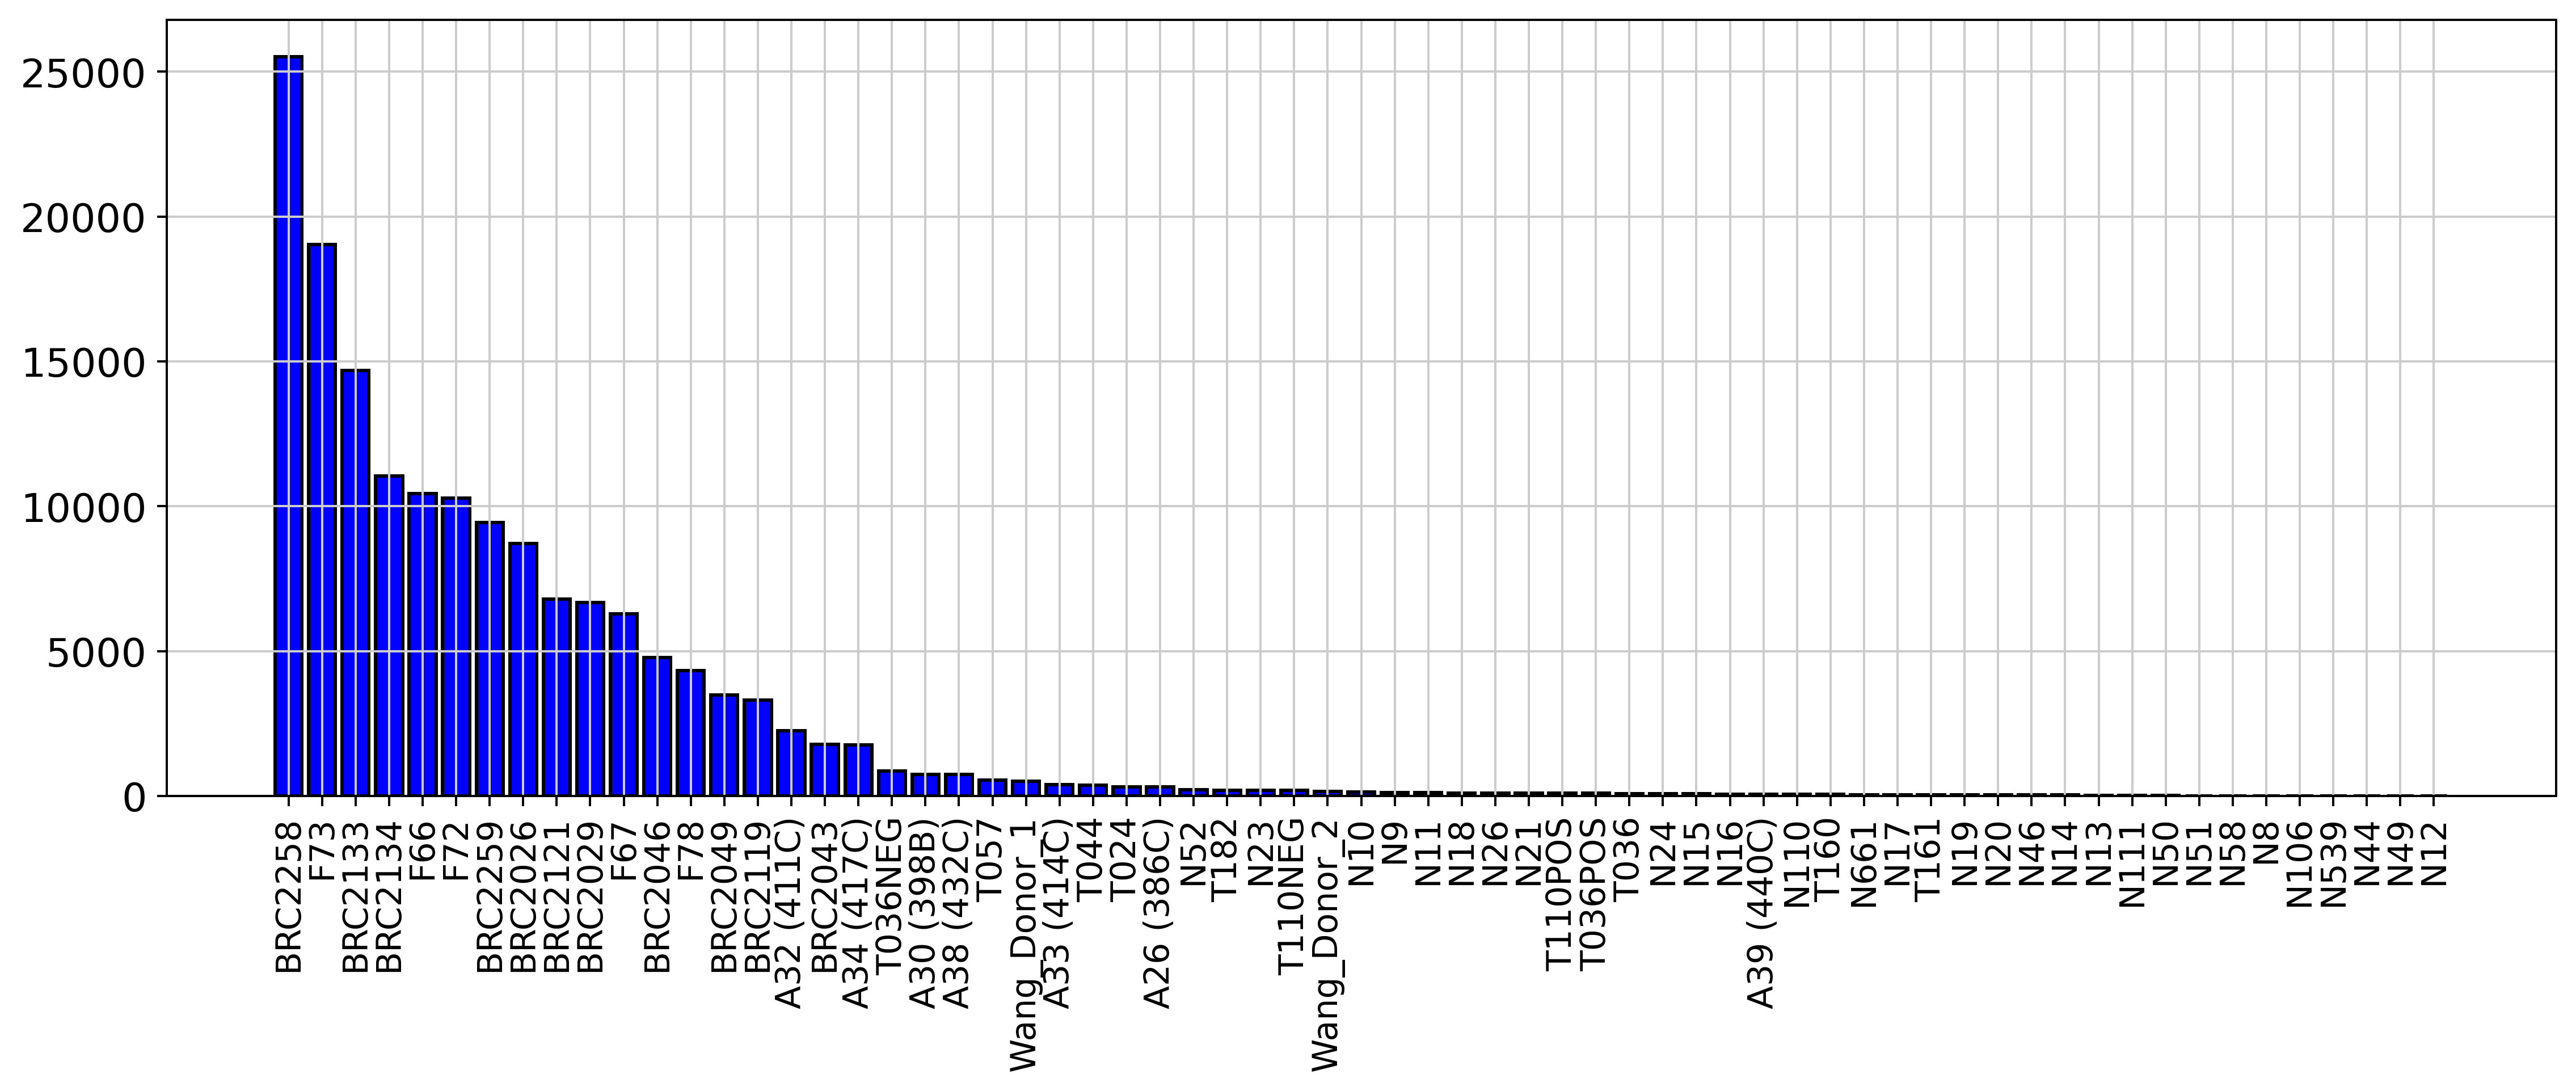

In [19]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(adata.obs["Donor_ID"].value_counts().index, adata.obs["Donor_ID"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
plt.xticks(rotation = 90, fontsize = 12)

In [20]:
sc.pp.highly_variable_genes(
    adata,
    flavor = "seurat_v3",
    n_top_genes = 3000,
    layer = "counts",
    batch_key = "Donor_ID",
    subset = True,
    span = 1
)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


### Transfer of annotation with scANVI

In [21]:
scvi.model.SCVI.setup_anndata(adata, batch_key = 'Donor_ID', labels_key = "seed_labels", layer = 'counts')

In [22]:
scvi_model = scvi.model.SCVI(adata, n_latent = 50, n_layers = 3, dispersion = 'gene-batch', gene_likelihood = 'nb')

In [23]:
scvi_model.train(150)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 150/150: 100%|███████| 150/150 [33:09<00:00, 14.43s/it, loss=355, v_num=1]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 150/150: 100%|███████| 150/150 [33:09<00:00, 13.26s/it, loss=355, v_num=1]


### Label transfer with `scANVI` 

In [24]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(scvi_model, 'Unknown')

In [25]:
scanvi_model.train(50)

INFO     Training for 50 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|███████████| 50/50 [25:37<00:00, 30.97s/it, loss=467, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|███████████| 50/50 [25:37<00:00, 30.74s/it, loss=467, v_num=1]


In [26]:
adata.obs["C_scANVI"] = scanvi_model.predict(adata)

- Extract latent representation

In [27]:
adata.obsm["X_scANVI"] = scanvi_model.get_latent_representation(adata)

- Visualise corrected dataset

In [28]:
sc.pp.neighbors(adata, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
sc.tl.umap(adata, min_dist = 0.2, spread = 2, random_state = 1712)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:25)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:05:27)


In [29]:
adata.obs

UniqueCell_ID  \
cell_id                                                                            
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference  AACACGTTCTTGCATT_Ileum-1_Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference  AACCGCGCATGAAGTA_Ileum-1_Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference  AACTCAGAGCGATCCC_Ileum-1_Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference  AACTCCCTCTCAACTT_Ileum-1_Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference  AACTCTTAGCTTCGCG_Ileum-1_Stem Cell   
...                                                                          ...   
GAAATGAAGTCCATAC-1-WTDAtest7770719-query                                     nan   
GAACGGATCGAGAGCA-1-WTDAtest7770719-query                                     nan   
GTCGGGTAGACTCGGA-1-WTDAtest7770719-query                                     nan   
TAGTGGTGTGTTCGAT-1-WTDAtest7770719-query                                     nan   
TGAGGGAAGCACACAG-1-WTDAtest7770719-query                                     nan   

                                                       Sample_ID     CellType  \
cell_id                                                                         
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference             Ileum-1    Stem Cell   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference             Ileum-1    Stem Cell   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference             Ileum-1    Stem Cell   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference             Ileum-1    Stem Cell   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference             Ileum-1    Stem Cell   
...                                                          ...          ...   
GAAATGAAGTCCATAC-1-WTDAtest7770719-query      A30-SCL-6-SC-45N-2  Mesenchymal   
GAACGGATCGAGAGCA-1-WTDAtest7770719-query      A30-SCL-6-SC-45N-2  Mesenchymal   
GTCGGGTAGACTCGGA-1-WTDAtest7770719-query      A30-SCL-6-SC-45N-2  Mesenchymal   
TAGTGGTGTGTTCGAT-1-WTDAtest7770719-query      A30-SCL-6-SC-45N-2  Mesenchymal   
TGAGGGAAGCACACAG-1-WTDAtest7770719-query      A30-SCL-6-SC-45N-2  Mesenchymal   

                                                  Study_name      Donor_ID  \
cell_id                                                                      
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference            Wang  Wang_Donor_1   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference            Wang  Wang_Donor_1   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference            Wang  Wang_Donor_1   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference            Wang  Wang_Donor_1   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference            Wang  Wang_Donor_1   
...                                                      ...           ...   
GAAATGAAGTCCATAC-1-WTDAtest7770719-query      Gut Cell Atlas    A30 (398B)   
GAACGGATCGAGAGCA-1-WTDAtest7770719-query      Gut Cell Atlas    A30 (398B)   
GTCGGGTAGACTCGGA-1-WTDAtest7770719-query      Gut Cell Atlas    A30 (398B)   
TAGTGGTGTGTTCGAT-1-WTDAtest7770719-query      Gut Cell Atlas    A30 (398B)   
TGAGGGAAGCACACAG-1-WTDAtest7770719-query      Gut Cell Atlas    A30 (398B)   

                                                  Diagnosis    Age  \
cell_id                                                              
AACACGTTCTTGCATT_Ileum-1_Stem Cell-reference  Healthy adult    nan   
AACCGCGCATGAAGTA_Ileum-1_Stem Cell-reference  Healthy adult    nan   
AACTCAGAGCGATCCC_Ileum-1_Stem Cell-reference  Healthy adult    nan   
AACTCCCTCTCAACTT_Ileum-1_Stem Cell-reference  Healthy adult    nan   
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell-reference  Healthy adult    nan   
...                                                     ...    ...   
GAAATGAAGTCCATAC-1-WTDAtest7770719-query      Healthy adult  20-25   
GAACGGATCGAGAGCA-1-WTDAtest7770719-query      Healthy adult  20-25   
GTCGGGTAGACTCGGA-1-WTDAtest7770719-query      Healthy adult  20-25   
TAGTGGTGTGTTCGAT-1-WTDAtest7770719-query      Healthy adult  20-25   
TGAGGGAAGCACACAG-1-WTDAtest7770719-query      Healthy adult  20-2

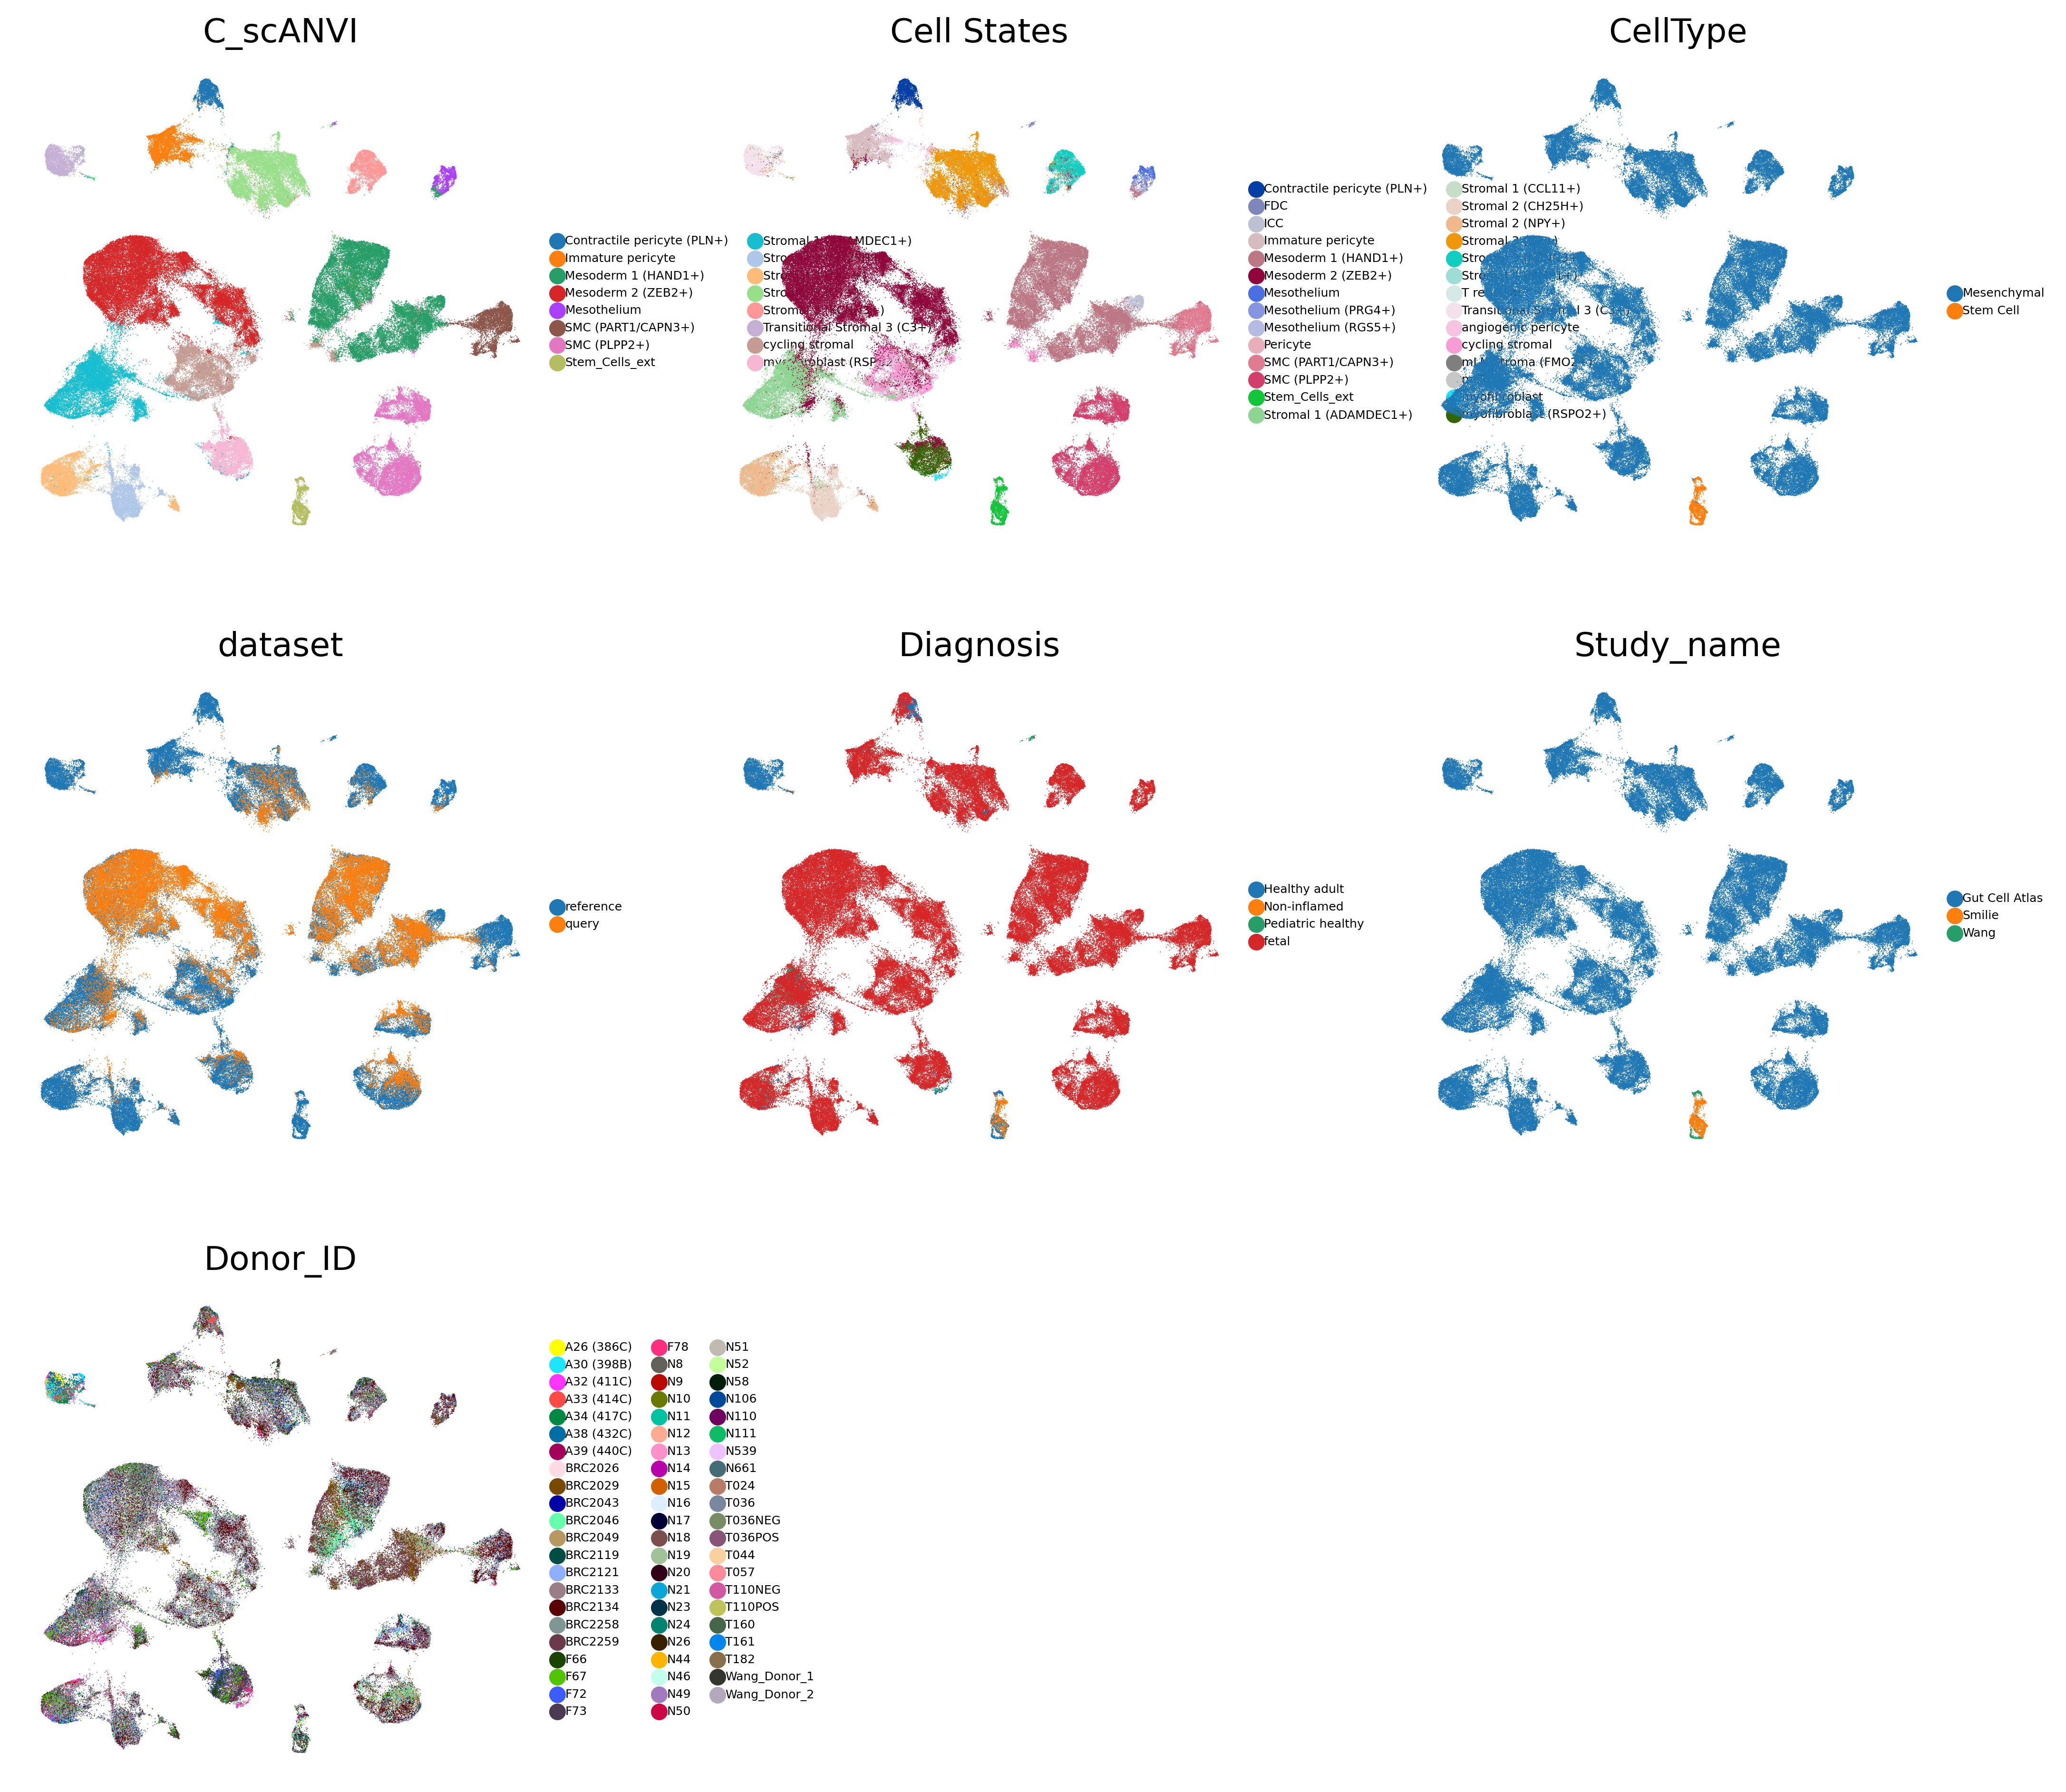

In [30]:
sc.pl.umap(adata, frameon = False, color = ['C_scANVI', 'Cell States', 'CellType', 'dataset', 'Diagnosis', 'Study_name', 'Donor_ID'], size = 0.6, legend_fontsize = 5, ncols = 3)

In [31]:
#Write anndata object to file
adata.write_h5ad('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/scANVI/Mesenchymal_cells_after_scanvi.h5ad')

### Models Validation

In [32]:
input_file = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/scANVI/Mesenchymal_cells_after_scanvi.h5ad'
output_file = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/scANVI/Mesenchymal_cells_after_scanvi_output.h5ad'
adata = sc.read_h5ad(input_file)

In [33]:
adata.obs['C_scANVI'].value_counts()

Mesoderm 2 (ZEB2+)              31763
Mesoderm 1 (HAND1+)             27197
Stromal 1 (ADAMDEC1+)           14841
SMC (PLPP2+)                    13456
Stromal 3 (C7+)                 13291
cycling stromal                 10080
Stromal 2 (NPY+)                 6802
myofibroblast (RSPO2+)           6469
SMC (PART1/CAPN3+)               6247
Stromal 2 (CH25H+)               5859
Immature pericyte                5557
Stromal 3 (KCNN3+)               5147
Transitional Stromal 3 (C3+)     3801
Stem_Cells_ext                   3001
Contractile pericyte (PLN+)      2764
Mesothelium                      2018
Name: C_scANVI, dtype: int64

In [34]:
adata.obs['Cell States'].value_counts()

Mesoderm 2 (ZEB2+)              34731
Mesoderm 1 (HAND1+)             29399
SMC (PLPP2+)                    13156
Stromal 3 (C7+)                 12412
Stromal 1 (ADAMDEC1+)           11296
cycling stromal                  8751
Stromal 2 (NPY+)                 6715
SMC (PART1/CAPN3+)               5714
myofibroblast (RSPO2+)           5634
Stromal 2 (CH25H+)               5608
Immature pericyte                4511
Stromal 3 (KCNN3+)               4402
Transitional Stromal 3 (C3+)     3636
Contractile pericyte (PLN+)      2634
Stem_Cells_ext                   2508
Stromal 1 (CCL11+)               1728
ICC                              1404
Mesothelium                      1036
angiogenic pericyte               994
Mesothelium (RGS5+)               869
Pericyte                          275
myofibroblast                     248
FDC                               177
T reticular                       158
mLN Stroma (FMO2+)                129
mLTo                              123
Mesothelium 

Text(0, 0.5, 'Observed')

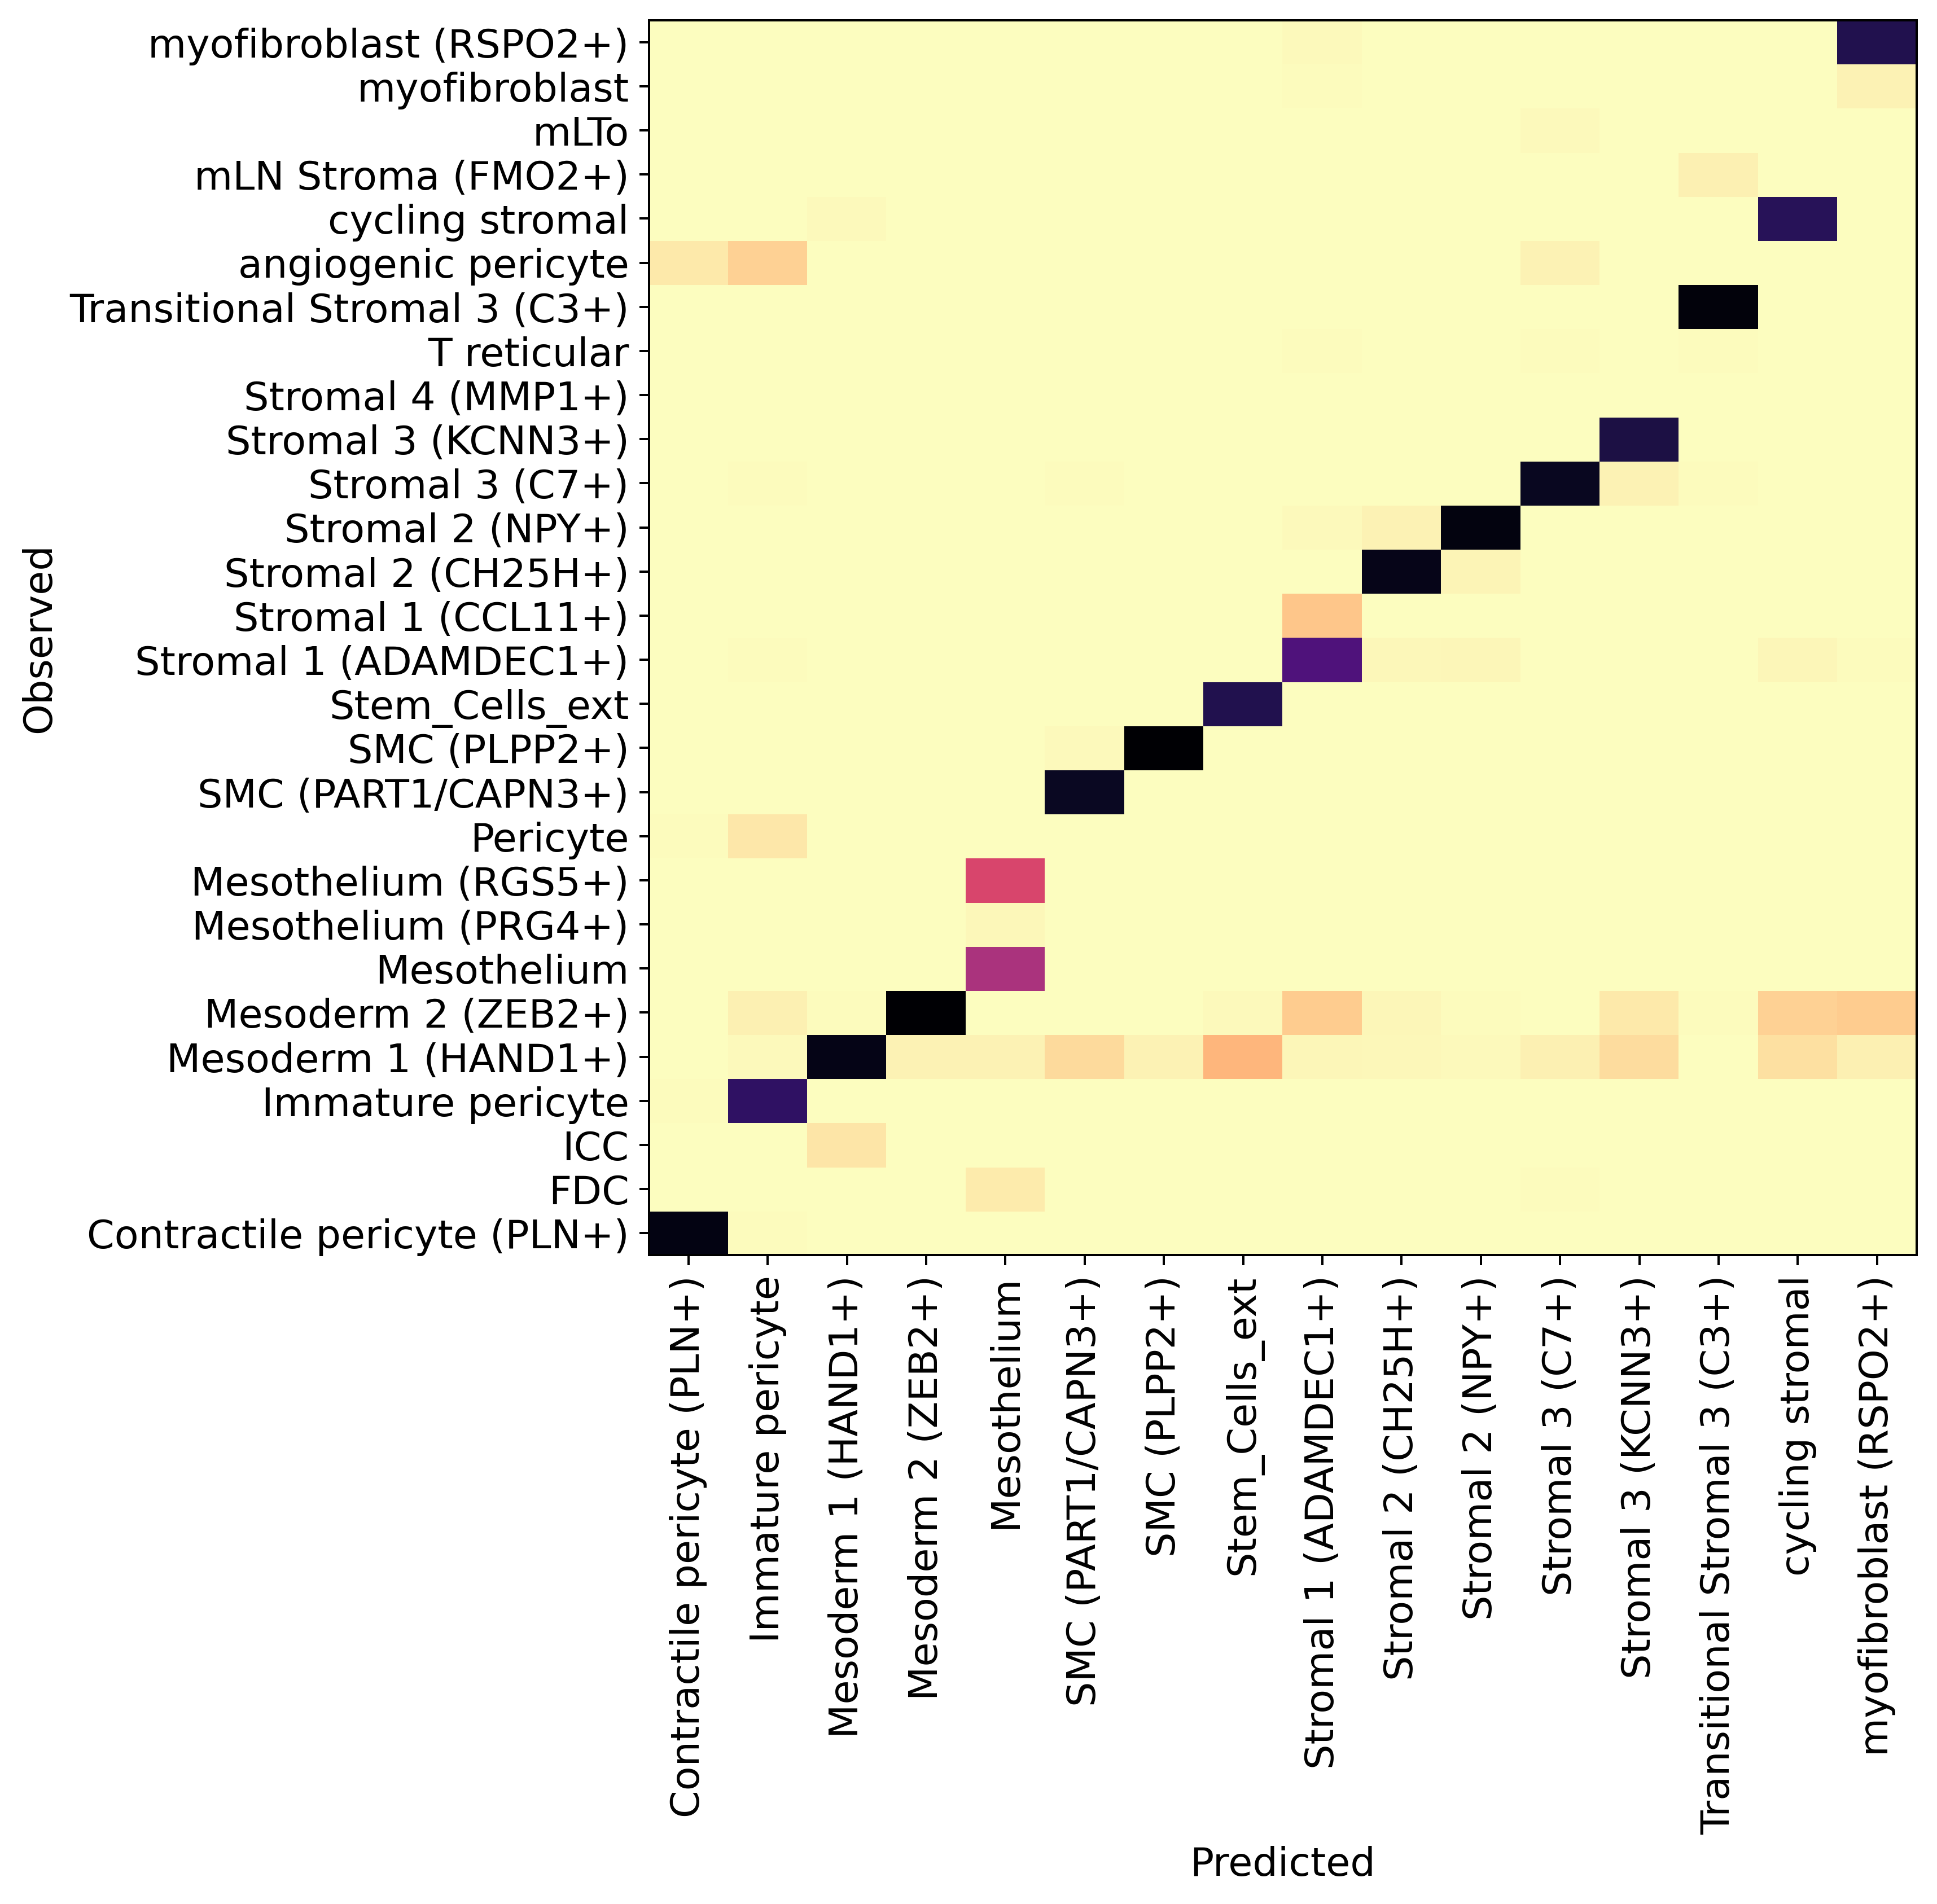

In [35]:
#Validation of the clusters
df = adata.obs.groupby(['Cell States', "C_scANVI"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [37]:
#Calculate accuracy
print(f"Acc: {np.mean(adata.obs['Cell States'].cat.codes == adata.obs['C_scANVI'].cat.codes)}")

Acc: 0.025515973542734043
